# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [125]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [126]:
url= "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

city_name = []
print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")
for city in cities:
    response = requests.get(url, params={ "q": city, "APPID": api_key, "units": units })
    if response.status_code == 200:
        formatted_response = response.json()
        city_name.append(formatted_response)
        print(f"Processing Record {cities.index(city)} of {city}")

    else:
        print("Cannot find a city.")
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 0 of beloha
Processing Record 1 of dingle
Processing Record 2 of albany
Processing Record 3 of kirakira
Processing Record 4 of bredasdorp
Processing Record 5 of yatou
Processing Record 6 of hobart
Processing Record 7 of rio gallegos
Processing Record 8 of puerto ayora
Processing Record 9 of nioki
Processing Record 10 of adrar
Processing Record 11 of faanui
Processing Record 12 of boa vista
Processing Record 13 of punta arenas
Processing Record 14 of ushuaia
Processing Record 15 of hasaki
Processing Record 16 of deputatskiy
Processing Record 17 of kalmunai
Processing Record 18 of victor harbor
Processing Record 19 of tasiilaq
Processing Record 20 of charters towers
Processing Record 21 of comodoro rivadavia
Processing Record 22 of akdepe
Processing Record 23 of thinadhoo
Processing Record 24 of breves
Processing Record 25 of yellowknife
Processing Record 26 of 

Processing Record 252 of gijon
Processing Record 253 of aksay
Processing Record 254 of katsuura
Processing Record 255 of ca mau
Processing Record 256 of hithadhoo
Processing Record 257 of traverse city
Processing Record 258 of aquiraz
Processing Record 259 of saint-leu
Processing Record 260 of presidente medici
Processing Record 261 of yamada
Processing Record 262 of gazanjyk
Processing Record 263 of aksu
Processing Record 264 of pontianak
Cannot find a city.
Processing Record 266 of chuy
Processing Record 267 of nanchang
Processing Record 268 of honiara
Processing Record 269 of port macquarie
Processing Record 270 of khatassy
Processing Record 271 of geraldton
Processing Record 272 of naze
Processing Record 273 of cap malheureux
Processing Record 274 of griffith
Processing Record 275 of shirokiy
Processing Record 276 of fort walton beach
Processing Record 277 of puerto narino
Processing Record 278 of kizukuri
Processing Record 279 of xingyi
Processing Record 280 of malindi
Processing 

Processing Record 504 of sikonge
Processing Record 505 of ushtobe
Processing Record 506 of mayo
Processing Record 507 of husavik
Processing Record 508 of lamar
Processing Record 509 of san juan
Processing Record 510 of loralai
Processing Record 511 of saint-augustin
Processing Record 512 of piney green
Processing Record 513 of bestobe
Cannot find a city.
Processing Record 515 of noumea
Processing Record 516 of sao domingos
Processing Record 517 of marica
Processing Record 518 of sisimiut
Cannot find a city.
Processing Record 520 of corinto
Cannot find a city.
Cannot find a city.
Processing Record 523 of ulaanbaatar
Processing Record 524 of nikel
Processing Record 525 of los llanos de aridane
Processing Record 526 of severo-yeniseyskiy
Cannot find a city.
Processing Record 528 of nioro
Processing Record 529 of dhidhdhoo
Processing Record 530 of semnan
Processing Record 531 of naryan-mar
Processing Record 532 of henties bay
Processing Record 533 of dunedin
Processing Record 534 of san la

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
print(city_name)

[{'coord': {'lon': 45.06, 'lat': -25.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.32, 'pressure': 1020.5, 'humidity': 64, 'temp_min': 74.32, 'temp_max': 74.32, 'sea_level': 1020.5, 'grnd_level': 999.01}, 'wind': {'speed': 9.4, 'deg': 136.794}, 'clouds': {'all': 64}, 'dt': 1569995567, 'sys': {'message': 0.0076, 'country': 'MG', 'sunrise': 1569983945, 'sunset': 1570028357}, 'timezone': 10800, 'id': 1067565, 'name': 'Beloha', 'cod': 200}, {'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.6, 'pressure': 1009.95, 'humidity': 67, 'temp_min': 85.6, 'temp_max': 85.6, 'sea_level': 1009.95, 'grnd_level': 993.47}, 'wind': {'speed': 3.62, 'deg': 156.429}, 'rain': {'3h': 2.438}, 'clouds': {'all': 94}, 'dt': 1569995567, 'sys': {'message': 0.0057, 'country': 'PH', 'sunrise': 1569965881, 'sunset': 15

In [128]:
# set up lists to hold reponse info
name= []
cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Building Dataframe
for cities in city_name:
    name.append(cities['name'])
    cloudiness.append(cities['clouds']['all'])
    country.append(cities['sys']['country'])
    date.append(cities['dt'])
    humidity.append(cities['main']['humidity'])
    lat.append(cities['coord']['lat'])
    lng.append(cities['coord']['lon'])
    temp.append(cities['main']['temp_max'])
    wind.append(cities['wind']['speed'])
    

weather_cities = pd.DataFrame({"City":name,
                          "Cloudiness": cloudiness,
                          "Country":country,
                          "Date":date,
                          "Humidity":humidity,
                          "Latitude":lat,
                          "Lng":lng,
                          "Max Temp":temp,
                          "Wind Speed":wind})

#export to csv file
weather_cities.to_csv("weather_data.csv")

weather_cities

City  Cloudiness Country        Date  Humidity  Latitude  \
0                 Beloha          64      MG  1569995567        64    -25.17   
1                 Dingle          94      PH  1569995567        67     11.00   
2                 Albany          75      US  1569995567        69     42.65   
3               Kirakira          99      SB  1569995567        86    -10.46   
4             Bredasdorp         100      ZA  1569995568        87    -34.53   
5                  Yatou          75      CM  1569995568       100      3.63   
6                 Hobart           0      AU  1569995441        51    -42.88   
7           Rio Gallegos           0      AR  1569995568        74    -51.62   
8           Puerto Ayora          75      EC  1569995568        94     -0.74   
9                  Nioki         100      CD  1569995568        85     -2.72   
10                 Adrar           0      DZ  1569995569        13     27.87   
11                Faanui          47      PF  1569995569        78    -16.48   
12             Boa Vista           0      BR  1569995332        74      2.82   
13          Punta Arenas          75      CL  1569995569        75    -53.16   
14               Ushuaia          40      AR  1569995281        69    -54.81   
15                Hasaki          20      JP  1569995569        48     35.73   
16           Deputatskiy         100      RU  1569995570        88     69.30   
17              Kalmunai         100      LK  1569995570        50      7.42   
18         Victor Harbor           0      AU  1569995570        72    -35.55   
19              Tasiilaq          99      GL  1569995570        64     65.61   
20       Charters Towers          48      AU  1569995570        39    -20.07   
21    Comodoro Rivadavia           0      AR  1569995284        80    -45.87   
22                Akdepe           0      TM  1569995571        26     42.05   
23             Thinadhoo          79      MV  1569995571        75      0.53   
24                Breves          40      BR  1569995571        94     -1.68   
25           Yellowknife          20      CA  1569995307        86     62.45   
26             Jamestown           0      AU  1569995571        17    -33.21   
27                 Bluff          72      AU  1569995572        46    -23.58   
28             Cape Town           0      ZA  1569995317        87    -33.93   
29                  Abha           0      SA  1569995572        68     18.22   
..                   ...         ...     ...         ...       ...       ...   
500          Bay Roberts          90      CA  1569995672        75     47.58   
501             Freeport          10      BS  1569995672        82     26.54   
502                 Puro          81      PH  1569995672        73     13.13   
503             Bandundu          56      CD  1569995672        87     -3.32   
504           Novoagansk         100      RU  1569995672        93     61.94   
505                Amapa          75      HN  1569995673        88     15.09   
506                Wajir          66      KE  1569995673        62      1.75   
507              Mareeba          40      AU  1569995673        54    -16.99   
508                Yilan           0      CN  1569995673        46     43.11   
509         Port Hedland           0      AU  1569995673        24    -20.31   
510  Sant Julia de Loria          21      AD  1569995674        48     42.46   
511                Paoua         100      CF  1569995674        95      7.24   
512           Ust-Omchug         100      RU  1569995674        94     61.13   
513               Pedasi          88      PA  1569995674        91      7.53   
514             Rochegda          90      RU  1569995674        80     62.67   
515              Atbasar          80      KZ  1569995675        43     51.81   
516              Bakchar          74      RU  1569995675        53     57.02   
517             Acapulco          20      MX  1569995675        88     16.86   
518            Odess

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

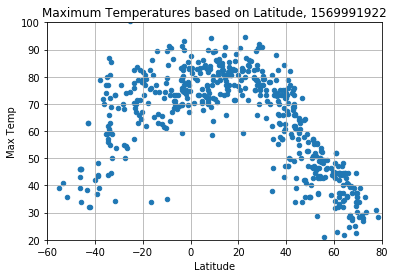

In [129]:
# Build a scatter plot for each data type
weather_cities.plot(kind="scatter", x="Latitude" ,y="Max Temp")

# Incorporate the other graph properties
plt.grid()
plt.title(f"Maximum Temperatures based on Latitude, {cities_df['Date'][0]}")
plt.xlim(-60, 80)
plt.ylim(20, 100)
# Save the figure
plt.savefig("latVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

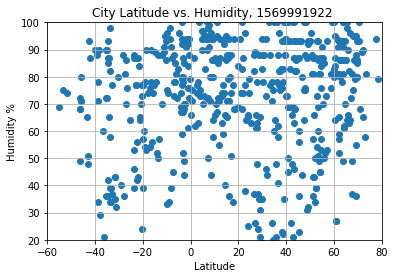

In [130]:
plt.scatter(weather_cities["Latitude"], weather_cities["Humidity"], marker="o")
plt.title(f"City Latitude vs. Humidity, {cities_df['Date'][0]} ")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

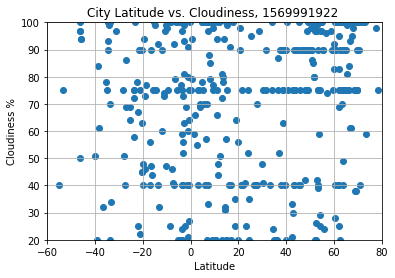

In [131]:
plt.scatter(weather_cities["Latitude"], weather_cities["Cloudiness"], marker="o")
plt.title(f"City Latitude vs. Cloudiness, {cities_df['Date'][0]} ")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

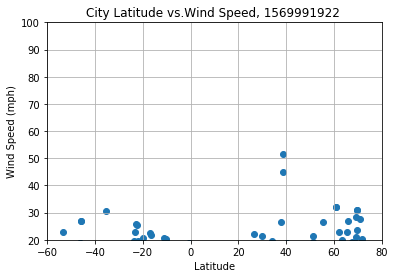

In [132]:
plt.scatter(weather_cities["Latitude"], weather_cities["Wind Speed"], marker="o")
plt.title(f"City Latitude vs.Wind Speed, {cities_df['Date'][0]} ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsWindSpeed.png")

# Show plot
plt.show()